In [1]:
from pathlib import Path
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
import matplotlib as mpl
from icwaves.data_loaders import load_raw_train_set_per_class
from spectrum import MultiTapering

In [2]:
plt.rcParams.update({
    "text.usetex": True,    
    "font.size": 12
})
img_dir = Path('/home/cmendoza/MEGA/Research/dissertation/LaTeX/img/')

In [3]:
IC_classes = [
    'brain', 'muscle', 'eye', 'Heart',
    'Line Noise', 'Channel Noise', 'Other']
IC_abbrev_classes = ['brain', 'muscle', 'eye', 'heart',
    'lineNoise', 'channelNoise', 'other']

In [69]:
def show_codebook(codebook, normalizer=None, cm_name=None):
    
    if normalizer is not None:
        cm = mpl.colormaps[cm_name]    
        var = np.var(centroids, axis=1)    

    k, P = codebook.shape
    n_rows = np.round(np.sqrt(k)).astype(int)
    n_cols = np.round(k / n_rows).astype(int)
    assert n_rows*n_cols >= k
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols, n_rows))
    ax = ax.flatten()
    for i in range(n_rows*n_cols):
        if i < k:
            if normalizer is not None:
                c = cm(normalizer(var[i]))
            else:
                prop_cycle = plt.rcParams['axes.prop_cycle']
                colors = prop_cycle.by_key()['color']
                c = colors[0]
            ax[i].plot(codebook[i], c=c)
        ax[i].axis('off')

    if normalizer is not None:
        return fig, ax, cm
    else:
        return fig, ax

In [3]:
class Args:
    root = '..'
    window_len = 384    
    num_clusters = 128
    centroid_len = 256
    srate = 256
    penalty = 'elasticnet'
    regularization_factor = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
    expert_weight = [1.0, 2.0, 4.0, 8.0, 16.0, 32.0]
    l1_ratio = [0, 0.2, 0.4, 0.6, 0.8, 1]
    minutes_per_ic = 50.0
    ics_per_subject = 2    

args = Args()
rng = default_rng(13)
args.class_label = 4  # Matlab indexing: starts at 1

In [6]:
X = load_raw_train_set_per_class(args, rng)

23it [01:51,  4.86s/it]


Training ICs for 'Heart': 34
Number of training hours: 28.33


23it [00:00, 253.17it/s]


In [ ]:
for i_class in range(7):
    dict_dir = Path(args.root, 'results/dictionaries')
    fname = (
        f'sikmeans_P-{args.centroid_len}_k-{args.num_clusters}'
        f'_class-{i_class+1}_minutesPerIC-{args.minutes_per_ic}'
        f'_icsPerSubj-{args.ics_per_subject}.npz'
    )
    fpath = dict_dir.joinpath(fname)
    with np.load(fpath) as data:
        centroids = data['centroids']
        labels = data['labels']
        shifts = data['shifts']
        distances = data['distances']
    
    unique_labels, cluster_size = np.unique(labels, return_counts=True)
    
    # Sort centroids in descending order of cluster size
    isort = np.argsort(-cluster_size)
    centroids = centroids[isort]
    unique_labels = unique_labels[isort]
    cluster_size = cluster_size[isort]
    
    var = np.var(centroids, axis=1)
    normalizer = mpl.colors.LogNorm(vmin=var.min(), vmax=var.max())    
    fig, ax, cmap = show_codebook(centroids, normalizer, cm_name='viridis')
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.81, 0.15, 0.05, 0.7])    
    fig.colorbar(
        mpl.cm.ScalarMappable(
            norm=normalizer,
            cmap=cmap),
        cax=cbar_ax
    )
    fpath = img_dir.joinpath(f'{IC_abbrev_classes[i_class]}_centroids.pdf')
    plt.savefig(fpath, bbox_inches='tight', pad_inches=0)    

In [ ]:
for i_class in range(7):
    dict_dir = Path(args.root, 'results/dictionaries')
    fname = (
        f'sikmeans_P-{args.centroid_len}_k-{args.num_clusters}'
        f'_class-{i_class+1}_minutesPerIC-{args.minutes_per_ic}'
        f'_icsPerSubj-{args.ics_per_subject}.npz'
    )
    fpath = dict_dir.joinpath(fname)
    with np.load(fpath) as data:
        centroids = data['centroids']
        labels = data['labels']
        shifts = data['shifts']
        distances = data['distances']
    
    unique_labels, cluster_size = np.unique(labels, return_counts=True)
    
    # Sort centroids in descending order of cluster size
    isort = np.argsort(-cluster_size)
    centroids = centroids[isort]
    unique_labels = unique_labels[isort]
    cluster_size = cluster_size[isort]
    
    var = np.var(centroids, axis=1)
    normalizer = mpl.colors.LogNorm(vmin=var.min(), vmax=var.max())    
    fig, ax = show_codebook(centroids, normalizer=None, cm_name=None)    
    fpath = img_dir.joinpath(f'{IC_abbrev_classes[i_class]}_centroids.pdf')
    plt.savefig(fpath, bbox_inches='tight', pad_inches=0)    

In [ ]:
for i_class in range(7):
    fig_latex = (
        f'\\begin{{figure}}[htb]\n'
        f'\centering\n'
        f'\includegraphics[width=0.8\linewidth]{{{IC_abbrev_classes[i_class]}_centroids.pdf}}\n'
        f'\caption{{{IC_abbrev_classes[i_class]} centroids}}\n'
        f'\label{{fig:{IC_abbrev_classes[i_class]}_centroids}}\n'
        f'\end{{figure}}\n\n'
    )
    print(fig_latex)

In [4]:
i_class = 0
dict_dir = Path(args.root, 'results/dictionaries')
fname = (
    f'sikmeans_P-{args.centroid_len}_k-{args.num_clusters}'
    f'_class-{i_class+1}_minutesPerIC-{args.minutes_per_ic}'
    f'_icsPerSubj-{args.ics_per_subject}.npz'
)
fpath = dict_dir.joinpath(fname)
with np.load(fpath) as data:
    centroids = data['centroids']
    labels = data['labels']
    shifts = data['shifts']
    distances = data['distances']

unique_labels, cluster_size = np.unique(labels, return_counts=True)

# Sort centroids in descending order of cluster size
isort = np.argsort(-cluster_size)
centroids = centroids[isort]
unique_labels = unique_labels[isort]
cluster_size = cluster_size[isort]

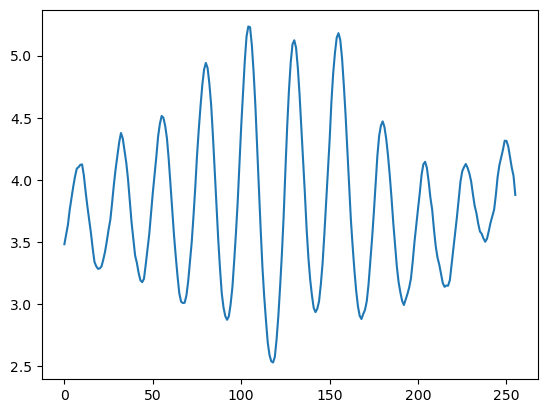

In [5]:
plt.plot(centroids[18])

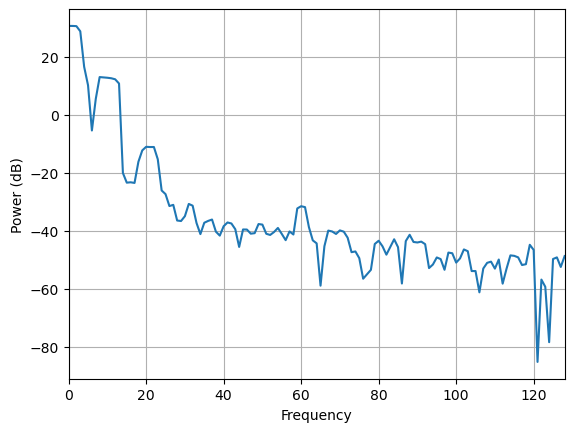

In [7]:
PSD = MultiTapering(centroids[18], NW=3, sampling=256)
PSD.plot()

In [13]:
unique_labels

array([ 12, 108,  71,   9, 121,  45,  36,  90,  56,  38,  44,  65,  62,
        75,  63,  22,  84,  52,  46,  51, 104,  17,  29, 101,  23,  13,
        53,  27, 106,  54, 126,  98,  47, 127,  59, 100,  15,  67,  78,
       122,  80, 109,  69, 112,  31,  74,  33, 114,  81,  92,  10,  48,
         6,  21,  70,   8,  97,  42,  41,  86,  16,  11,   2,  73, 124,
        85,  96,   0,  87,  88,  61,  99,  30,  93,  35, 107,  68,  49,
        14,  25,  57,  94,  28,  24,  89,  82, 115,  32, 102, 110,  37,
       103, 111, 118,  20,   1,  77,  19,  34,   4,  72,  39,  40,  18,
        79,  76,  50,  43,  60, 119,   3,   7, 125,  64,  58, 123,  83,
         5,  95, 113, 117, 105, 120,  66,  26, 116,  55,  91])

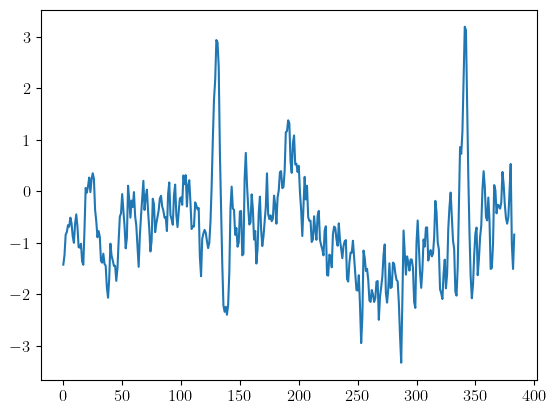

In [18]:
i_centroid = unique_labels[0]
in_cluster = (labels==i_centroid).nonzero()[0]
neigh = X[in_cluster]
dist = distances[in_cluster]
isort = np.argsort(dist)
plt.plot(neigh[isort[0]])

In [22]:
np.var(centroids[0]), np.var(neigh[isort[0]])

(0.009377824480300903, 0.85056275)

In [29]:
np.max(np.var(neigh, axis=1))

562.9388